In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('final-dataset.csv')

In [3]:
X = data.drop(columns=['Signal','Label','Hurst Component'])
y = data['Label']

In [4]:
features = X.columns
features

Index(['Mean (µV)', 'RMS (µV)', 'MRS (µV)', 'Zero Crossings', 'Frequency (Hz)',
       'Delta (µV² /Hz)', 'Theta (µV² /Hz)', 'Alpha (µV² /Hz)',
       'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Variance', 'Kurtosis',
       'Hjorth Mobility', 'Hjorth Complexity', 'Spectral Entropy'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [7]:
from sklearn import preprocessing as pre
X_train = pre.scale(X_train)
x_test = pre.scale(x_test)
x_val = pre.scale(x_val)
X_train.shape

(980, 16)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.linear_model import LogisticRegression
parameters = {'l1_ratio':(0,1), 'penalty':('l1', 'l2', 'elasticnet','none'), 'multi_class':('auto', 'ovr', 'multinomial'), 'C':range(1,10), 'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
clf = LogisticRegression(random_state=0, max_iter=1000)
clf = GridSearchCV(clf, parameters)

In [10]:
clf.fit(X_train, y_train)

c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Fr

GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': range(1, 10), 'l1_ratio': (0, 1),
                         'multi_class': ('auto', 'ovr', 'multinomial'),
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')})

In [11]:
clf.best_params_

{'C': 9,
 'l1_ratio': 0,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [12]:
clf.score(x_val, y_val)

0.6333333333333333

In [13]:
clf.score(x_test, y_test)

0.6190476190476191

In [14]:
y_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
y_true = y_test
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity is : " , specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy is : " , accuracy)
sensitivity = tp / (tp + fn)
print("Sensitivity is : " , sensitivity)
precision= (tp/(tp+fp))
print("Precision is : ", precision)
f1_Score = 2 * (precision * sensitivity) / (precision+ sensitivity)
print("f1_Score is :" , f1_Score)

Specificity is :  0.660377358490566
Accuracy is :  0.6190476190476191
Sensitivity is :  0.5769230769230769
Precision is :  0.625
f1_Score is : 0.6


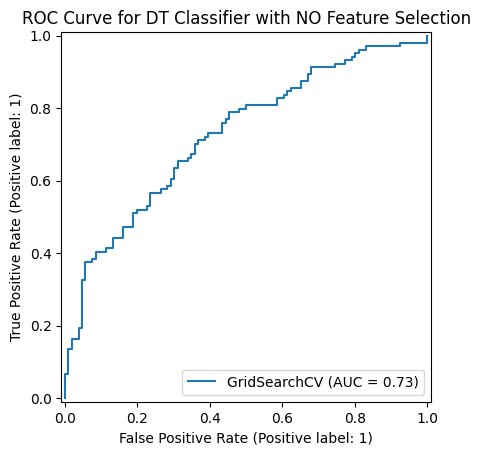

In [15]:
import matplotlib.pyplot as plt  
from sklearn import preprocessing as pre
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import RocCurveDisplay

X = pre.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.title("ROC Curve for DT Classifier with NO Feature Selection")
plt.show() 

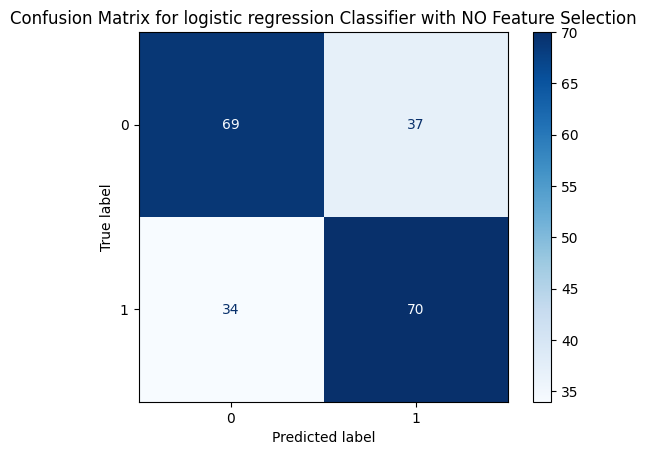

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the best model from GridSearchCV
best_model = clf.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix for logistic regression Classifier with NO Feature Selection")
plt.show()
